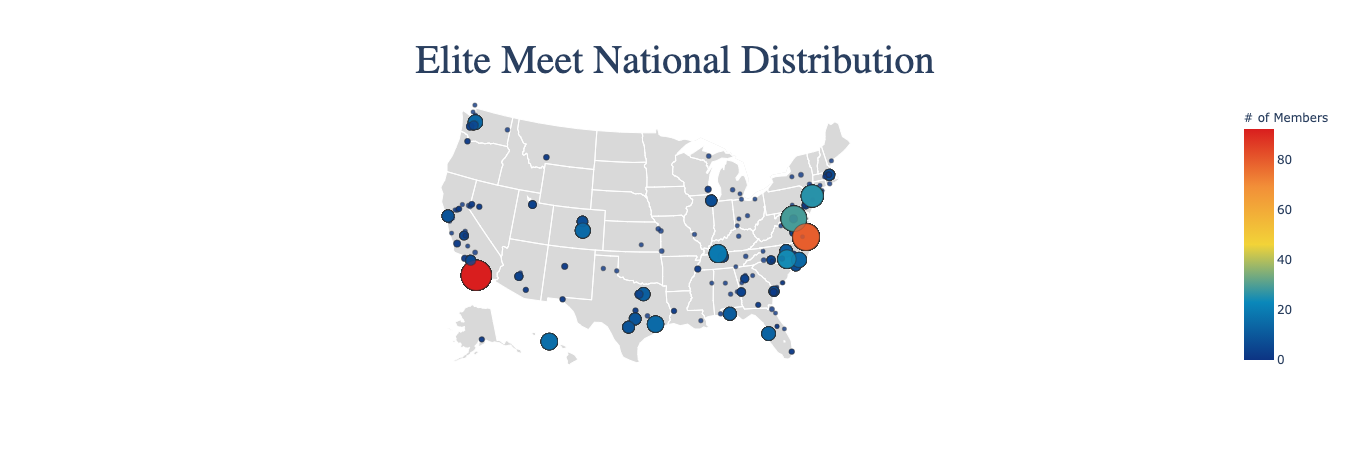

In [3]:
import os
import pathlib
import re
import pandas as pd

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from dash.dependencies import Input, Output, State
from data_processing import scaler
#import cufflinks as cf

app = dash.Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1.0"}],)
server = app.server

#Load data
vets = pd.read_csv('data/merged_df_dash.csv')
branches = vets['Branch'].unique()[:4]
map_df = vets[vets['scaled'].notnull()]
bubble_sizes = scaler(map_df['scaled'], 4, 30)

#Step 4. Create figure
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = map_df['longitude'],
        lat = map_df['latitude'],
        text = map_df['text'],
        mode = 'markers',
        hoverinfo='text',
        marker = dict(
            size = bubble_sizes,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0.5,
                color='rgb(40,40,40)'
            ),
            colorscale = 'portland',
            cmin = 0,
            color = map_df['Combined'],
            cmax = map_df['Combined'].max(),
            colorbar_title="# of Members"
        )))

fig.update_layout(
        title = 'Elite Meet National Distribution',
        title_font_family='Garamond',
        title_font_size=40,
        title_x=0.5,
        title_y=0.9,
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(217, 217, 217)",
            #subunitcolor = "rgb(217, 217, 217)",
            #countrycolor = "rgb(217, 217, 217)",
            #countrywidth = 1.5,
            #subunitwidth = 1.5
        )
    )
app.layout = html.Div(
    id="root",
    children=[
        html.Div(
            id="header",
            children=[
                html.H1(children="Elite Meet National Distribution", style={'fontfamily':'Garamond'}),
                html.H2(
                    id="description",
                    children="Distribution of Elite Meet members based on Branch or Tribe affiliation",
                ),
            ],
        ),
        html.Div(
            id="app-container",
            children=[
                html.Div(
                    id="left-column",
                    children=[
                        html.Div(
                            id="branch-drop-down",
                            children=[
                                html.P(
                                    id="bdd-text",
                                    children="Service Branch",
                                ),
                                dcc.Dropdown(
                                    id='Branches',
                                    options=[{'label':branch, 'value':branch} for branch in branches],
                                    value=branches,
                                    # allows user to select multiple drop down options
                                    multi=True,
                                    # allows the user to remove all options
                                    clearable=True,
                                    style={'width': 200}),
                            ],
                        ),
                        html.Div(
                            id="map-container",
                            children=[
                                html.P(
                                    "Elite Meet National Distribution: Total {}".format(len(map_df)),
                                    id="map-title",
                                ),
                                dcc.Graph(
                                    id="em_dist",
                                    figure=fig,
                                    style={"height": 650}),
                                    #dict(
                                      #  layout=dict(
                                      #      autosize=True,),
                            ],
                        ),
                    ],
                )])
            ])

#if __name__ == "__main__":
 #   app.run_server(debug=True)

In [16]:
top_hits = vets['How_did_you_hear_about_Elite_Meet'].value_counts()[vets['How_did_you_hear_about_Elite_Meet'].value_counts() > 2].index

In [17]:
df_top_hits = vets[vets['How_did_you_hear_about_Elite_Meet'].isin(top_hits)]

In [18]:
df_top_hits['How_did_you_hear_about_Elite_Meet'].value_counts()

Friend                       135
LinkedIn                      77
Co-worker                     71
Colleague                     39
Elite Meet member             36
John Allen                    13
Colleague - Transitioning      9
The Honor Foundation           8
Instagram                      8
Family                         7
Web search                     7
Ed Hine                        5
Garrett Harrell                4
Navy SEAL Foundation           4
Word of mouth                  4
LinkedIn - John Allen          4
SFL-TAP                        3
Networking                     3
Name: How_did_you_hear_about_Elite_Meet, dtype: int64

In [19]:
def slicer(df, tribe):
    newdf = df[df['Tribe'] == tribe]
    length = len(newdf)
    marketing = newdf['How_did_you_hear_about_Elite_Meet'].value_counts()/length * 100
    return marketing

In [51]:
tag = df_top_hits.groupby(['Tribe','How_did_you_hear_about_Elite_Meet'])['Tribe'].count().unstack()
tag.style.background_gradient(cmap ='magma').set_properties(**{'font-size': '20px'}).set_precision(2)

How_did_you_hear_about_Elite_Meet,Co-worker,Colleague,Colleague - Transitioning,Ed Hine,Elite Meet member,Family,Friend,Garrett Harrell,Instagram,John Allen,LinkedIn,LinkedIn - John Allen,Navy SEAL Foundation,Networking,SFL-TAP,The Honor Foundation,Web search,Word of mouth
Tribe,,,,,,,,,,,,,,,,,,
CCT,nan,2.00,nan,nan,nan,nan,4.00,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan
Civil Affairs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan
EOD,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan
Green Beret,11.00,16.00,3.00,nan,3.00,1.00,43.00,nan,5.00,nan,20.00,nan,nan,1.00,1.00,nan,2.00,2.00
Helo Pilot,5.00,1.00,nan,nan,6.00,1.00,4.00,nan,nan,1.00,6.00,nan,nan,nan,nan,nan,nan,nan
NEOD,4.00,3.00,nan,nan,4.00,nan,12.00,nan,nan,1.00,1.00,nan,nan,nan,nan,1.00,1.00,nan
PJ,nan,1.00,nan,nan,nan,nan,3.00,nan,1.00,nan,2.00,nan,nan,nan,nan,1.00,nan,nan
PSYOPS,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4.00,nan,nan,nan,nan,nan,nan,nan
Pilot,3.00,7.00,nan,4.00,7.00,2.00,22.00,nan,nan,nan,20.00,2.00,1.00,1.00,nan,nan,1.00,nan


In [55]:
pd.pivot_table(df_top_hits,index='Tribe',
                                    aggfunc='count',
                                    values='How_did_you_hear_about_Elite_Meet',
                                    margins=True)

,How_did_you_hear_about_Elite_Meet
Tribe,
CCT,7
Civil Affairs,1
EOD,2
Green Beret,108
Helo Pilot,24
NEOD,27
PJ,8
PSYOPS,4
Pilot,70


In [89]:
marketing = df_top_hits.groupby(['Tribe','How_did_you_hear_about_Elite_Meet'])['Tribe'].count().unstack()

In [90]:
marketing_pcts = marketing.T.apply(lambda x: 100*x/x.sum()).fillna(0)
marketing_pcts.style.background_gradient(cmap ='magma').set_properties(**{'font-size': '20px'}).set_precision(1)

Tribe,CCT,Civil Affairs,EOD,Green Beret,Helo Pilot,NEOD,PJ,PSYOPS,Pilot,Raider,Ranger,Recon,SEAL,SOWT,SWCC
How_did_you_hear_about_Elite_Meet,,,,,,,,,,,,,,,
Co-worker,0.0,0.0,0.0,10.2,20.8,14.8,0.0,0.0,4.3,9.4,13.5,20.0,32.9,0.0,41.2
Colleague,28.6,0.0,0.0,14.8,4.2,11.1,12.5,0.0,10.0,3.1,13.5,0.0,1.3,0.0,5.9
Colleague - Transitioning,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,12.5,0.0,0.0,1.3,0.0,2.9
Ed Hine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.7,0.0,0.0,0.0,1.3,0.0,0.0
Elite Meet member,0.0,0.0,0.0,2.8,25.0,14.8,0.0,0.0,10.0,12.5,5.4,0.0,1.3,0.0,26.5
Family,0.0,0.0,0.0,0.9,4.2,0.0,0.0,0.0,2.9,0.0,8.1,0.0,0.0,0.0,0.0
Friend,57.1,0.0,50.0,39.8,16.7,44.4,37.5,0.0,31.4,21.9,43.2,40.0,22.4,0.0,11.8
Garrett Harrell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.5,0.0,0.0,0.0,0.0,0.0
Instagram,0.0,0.0,0.0,4.6,0.0,0.0,12.5,0.0,0.0,3.1,2.7,0.0,0.0,0.0,0.0
